In [133]:
using Plots
using DelimitedFiles
# using Base.Threads

include("stabilityFunctions.jl");
println("Number of threads: ", Threads.nthreads())

Number of threads: 32


In [49]:
# constants 

Bond = 1.5
b = 0.1
ϵ = 1 - Bond/2

c1 = c0(1, b, Bond); # wave speed at k = 1

In [2]:
# import matlab solutions 
solutions = readdlm("test & misc/matlab_solutions.csv", ',', Float64);

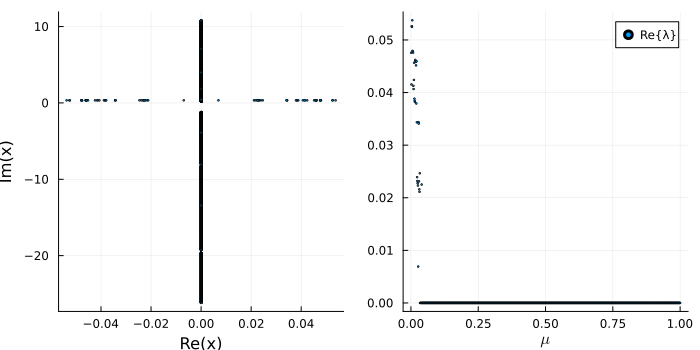

In [5]:
# compute eigenvalues λ
λ21000 = solveGenEig(solutions[40,:], 2, 1000)
stabilityPlots(λ21000, 1000)

In [11]:
solveGenEig(solutions[40,:], 8, 1000)

34×1000 Matrix{ComplexF64}:
   -0.0475863+0.33257im    -0.0415593+0.334896im  …   -3.13185e-8+62.943im
  -1.87802e-8+81.8824im   -9.78304e-8+81.8909im       -1.15052e-8+79.4109im
  -4.93518e-9-93.0343im   -6.03971e-8-128.823im       -1.10861e-8-103.055im
  -2.70347e-9+55.6848im   -3.25878e-8-114.1im          -6.0421e-9-93.023im
  -2.20855e-9-103.113im   -2.62516e-8-103.123im       -3.88565e-9-83.3149im
  -1.27911e-9-128.812im  -7.47818e-11-73.9597im   …   -1.42214e-9+48.7267im
  -1.27812e-9+48.7347im  -3.45376e-11+19.4573im       -1.12097e-9+42.1286im
 -3.48047e-10+35.8886im  -1.33464e-11-40.1355im      -4.14306e-10+1.82481im
 -1.54034e-10-56.2665im  -3.77986e-12-32.7063im      -4.08431e-10+10.6684im
 -1.25262e-10+30.0116im   -2.9464e-12+4.06521im      -3.03687e-10-64.9167im
             ⋮                                    ⋱  
  3.05872e-11+24.5247im   1.21329e-10+48.7415im   …   2.29536e-10-3.88824im
  6.16755e-11-64.9255im   1.46562e-10-64.9344im       2.71856e-10+7.07716im
  6.2103

In [4]:
for i in 1:100
    # solve for given solution
    sol = solveGenEig(solutions[i,:], 12, 84500)

    # save solution 
    writedlm("stabilitySolutions2/$(i).12.84500.stabSol.csv", sol, ',')
end

In [4]:
# load solution
sol = readdlm("stabilitySolutions2/1.12.84500.stabSol.csv", ',', Complex{Float64})

50×84500 Matrix{ComplexF64}:
   -1.0383e-6+113.132im    -6.01999e-7-171.286im  …  -3.78941e-5-221.276im
   -8.6707e-7-171.286im    -3.51854e-7+113.132im     -2.32389e-5+151.808im
   -4.3236e-8+104.101im    -2.59405e-7-159.424im     -6.36198e-7+131.965im
  -2.20737e-8-147.829im    -2.17052e-7+104.101im     -3.27408e-7+122.416im
  -1.93445e-8+78.651im     -6.51032e-8-136.51im      -6.18415e-8+4.0122im
  -1.04007e-8-125.475im    -5.40795e-8+86.8527im  …  -4.40171e-8+95.3299im
    -9.718e-9-114.731im    -5.86711e-9+78.6511im     -4.29235e-8+104.092im
  -8.48549e-9-221.29im     -4.84631e-9-114.731im     -1.63807e-8+78.643im
  -5.21542e-9+70.7427im    -2.59304e-9+70.7428im     -1.33586e-8-125.464im
 -8.89828e-10+0.332658im  -8.01774e-10+63.1373im      -6.6124e-9-13.6541im
             ⋮                                    ⋱  
   1.18115e-9+0.223166im    5.85849e-9-125.475im       4.4429e-8-147.818im
   2.21081e-8+95.3385im     8.73493e-7-183.41im       6.72088e-8+162.091im
   4.28132e-8-159.4

In [9]:
stabilityPlotsGPU(sol, 84500)

### **Equilibrium Jet**

First consider the stability of a the ferrofluid jet at equilibrium $S(z) = 1$.

The eigenvalues of the spectral problem for the equilibrium case are given by:

$$\lambda_{\mu + m} = ic(\mu + m) \pm ic_0 (\mu + m)$$

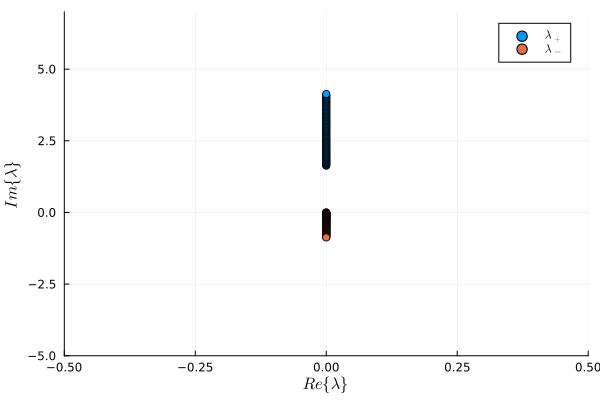

In [83]:
μ = collect(range(-1e-5, 10.0, 10000))
λ₊, λ₋ = λeq(μ, 1.0, c1, b, Bond)

# plotting 
scatter(real(λ1),imag(λ1), label=L"\lambda_+")
scatter!(real(λ2),imag(λ2), label=L"\lambda_-")

xlabel!(L"Re\{\lambda\}")
ylabel!(L"Im\{\lambda\}")

xlims!(-0.5,0.5)
ylims!(-5,7)

### **Collisions** 

Plotting the real part of $\lambda$ over the allowed values of the floquet parameter $\mu$ for various values of integer $m$ to visually look for collisions.

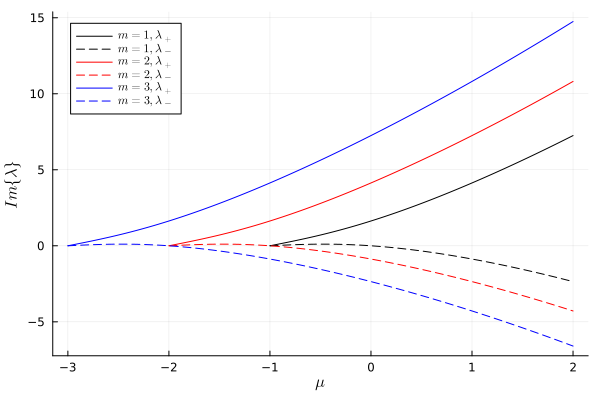

In [109]:
# define overall μ range
μ = collect(range(-10, 2, 10000))

# compute eq eigenvalues λ for m = 1 to 4
μ1, λ1₊, λ1₋ = λeq(μ, 1.0, c1, b, Bond)
μ2, λ2₊, λ2₋ = λeq(μ, 2.0, c1, b, Bond)
μ3, λ3₊, λ3₋ = λeq(μ, 3.0, c1, b, Bond)

# and also for m = -1, -2, -3, -4
μ1₋, λ1₊₋, λ1₋₋ = λeq(μ, -1.0, c1, b, Bond)
μ2₋, λ2₊₋, λ2₋₋ = λeq(μ, -2.0, c1, b, Bond)
μ3₋, λ3₊₋, λ3₋₋ = λeq(μ, -3.0, c1, b, Bond)

# plotting imaginary parts (solid lines for λ₊ and dashed lines for λ₋)
plot(μ1, imag(λ1₊), label=L"m = 1, \lambda_+", color=:black)
plot!(μ1, imag(λ1₋), label=L"m = 1, \lambda_-", color=:black, linestyle=:dash)

plot!(μ2, imag(λ2₊), label=L"m = 2, \lambda_+", color=:red)
plot!(μ2, imag(λ2₋), label=L"m = 2, \lambda_-", color=:red, linestyle=:dash)

plot!(μ3, imag(λ3₊), label=L"m = 3, \lambda_+", color=:blue)
plot!(μ3, imag(λ3₋), label=L"m = 3, \lambda_-", color=:blue, linestyle=:dash)


ylabel!(L"Im\{\lambda\}")
xlabel!(L"\mu")

# xlims!(-1.5,-0.5)

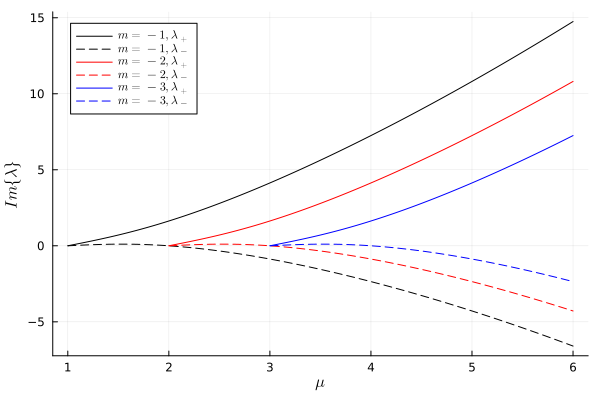

In [107]:
# now only look at range such that μ + m > 0 but m < 0

μ = collect(range(-10, 6, 10000))

μ1, λ1₊, λ1₋ = λeq(μ, -1.0, c1, b, Bond)
μ2, λ2₊, λ2₋ = λeq(μ, -2.0, c1, b, Bond)
μ3, λ3₊, λ3₋ = λeq(μ, -3.0, c1, b, Bond)

# plotting imaginary parts (solid lines for λ₊ and dashed lines for λ₋)
plot(μ1, imag(λ1₊), label=L"m = -1, \lambda_+", color=:black)
plot!(μ1, imag(λ1₋), label=L"m = -1, \lambda_-", color=:black, linestyle=:dash)

plot!(μ2, imag(λ2₊), label=L"m = -2, \lambda_+", color=:red)
plot!(μ2, imag(λ2₋), label=L"m = -2, \lambda_-", color=:red, linestyle=:dash)

plot!(μ3, imag(λ3₊), label=L"m = -3, \lambda_+", color=:blue)
plot!(μ3, imag(λ3₋), label=L"m = -3, \lambda_-", color=:blue, linestyle=:dash)

ylabel!(L"Im\{\lambda\}")
xlabel!(L"\mu")

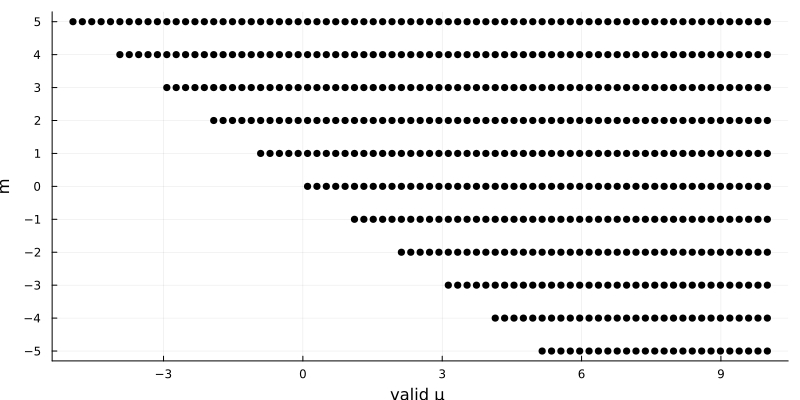

In [125]:
# Define the range of mu values and m values
mus = range(-10, stop=10, length=100)  # A range of mu values from -10 to 10
ms = -5:5  # m values from -5 to 5

# Prepare to plot
plot(size=(800, 400), xlabel= "valid μ ", ylabel="m")

# Add lines for each m value showing valid mu ranges
for m in ms
    valid_mus = mus[mus .+ m .>= 0]
    scatter!(valid_mus, fill(m, length(valid_mus)), color = :black)
end

plot!(legend = false)
yticks!(-5:1:5)

### Solving for collisions 

Now let's actually solve the trancendental equation for eigenvalue collisions. 